In [2]:
import time
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from astropy import stats, visualization

from sbigclient.sbigcam import MATCam, F9WFSCam

%load_ext autoreload
%autoreload 2

In [3]:
c = MATCam()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 18
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch Off
    USB 1 USB 1 Switch On
    USB 2 USB 2 Switch Off
  

In [4]:
c.process_events()

SBIG CCD FITS_HEADER FITS Header TextVector read and write
    FITS_OBSERVER Observer Text Mount Alignment Telescope
    FITS_OBJECT Object Text Unknown
SBIG CCD CFW_TYPE Type SwitchVector AtMostOne
    CFW1 CFW-2 Switch Off
    CFW2 CFW-5 Switch Off
    CFW3 CFW-6A Switch Off
    CFW4 CFW-8 Switch Off
    CFW5 CFW-402 Switch On
    CFW6 CFW-10 Switch Off
    CFW7 CFW-10 SA Switch Off
    CFW8 CFW-L Switch Off
    CFW9 CFW-9 Switch Off
    CFW10 CFW-8LG Switch Off
    CFW11 CFW-1603 Switch Off
    CFW12 CFW-FW5-STX Switch Off
    CFW13 CFW-FW5-8300 Switch Off
    CFW14 CFW-FW8-8300 Switch Off
    CFW15 CFW-FW7-STX Switch Off
    CFW16 CFW-FW8-STT Switch Off
SBIG CCD CFW_PRODUCT Product TextVector read only
    NAME Name Text CFW-402
    ID ID Text 0
SBIG CCD FILTER_SLOT Filter Slot NumberVector read and write
    FILTER_SLOT_VALUE Filter Number 1
got message by host :sbig-srv.mmto.arizona.edu : 
    INDImessage SBIG CCD Setting current filter to slot 1
got message by host :sbig-srv.mmt

In [11]:
#  filter 1 -> R
#  filter 2 -> V
#  filter 3 -> B
#  filter 4 -> clear
c.filter = 2

In [12]:
f = c.expose(exptime=1, exptype="Light")

SBIG CCD CCD_FRAME_TYPE Frame Type SwitchVector OneOfMany
    FRAME_LIGHT Light Switch On
    FRAME_BIAS Bias Switch Off
    FRAME_DARK Dark Switch Off
    FRAME_FLAT Flat Switch Off
SBIG CCD CCD_EXPOSURE Expose NumberVector read and write
    CCD_EXPOSURE_VALUE Duration (s) Number 1
reading out...


<IPython.core.display.Javascript object>


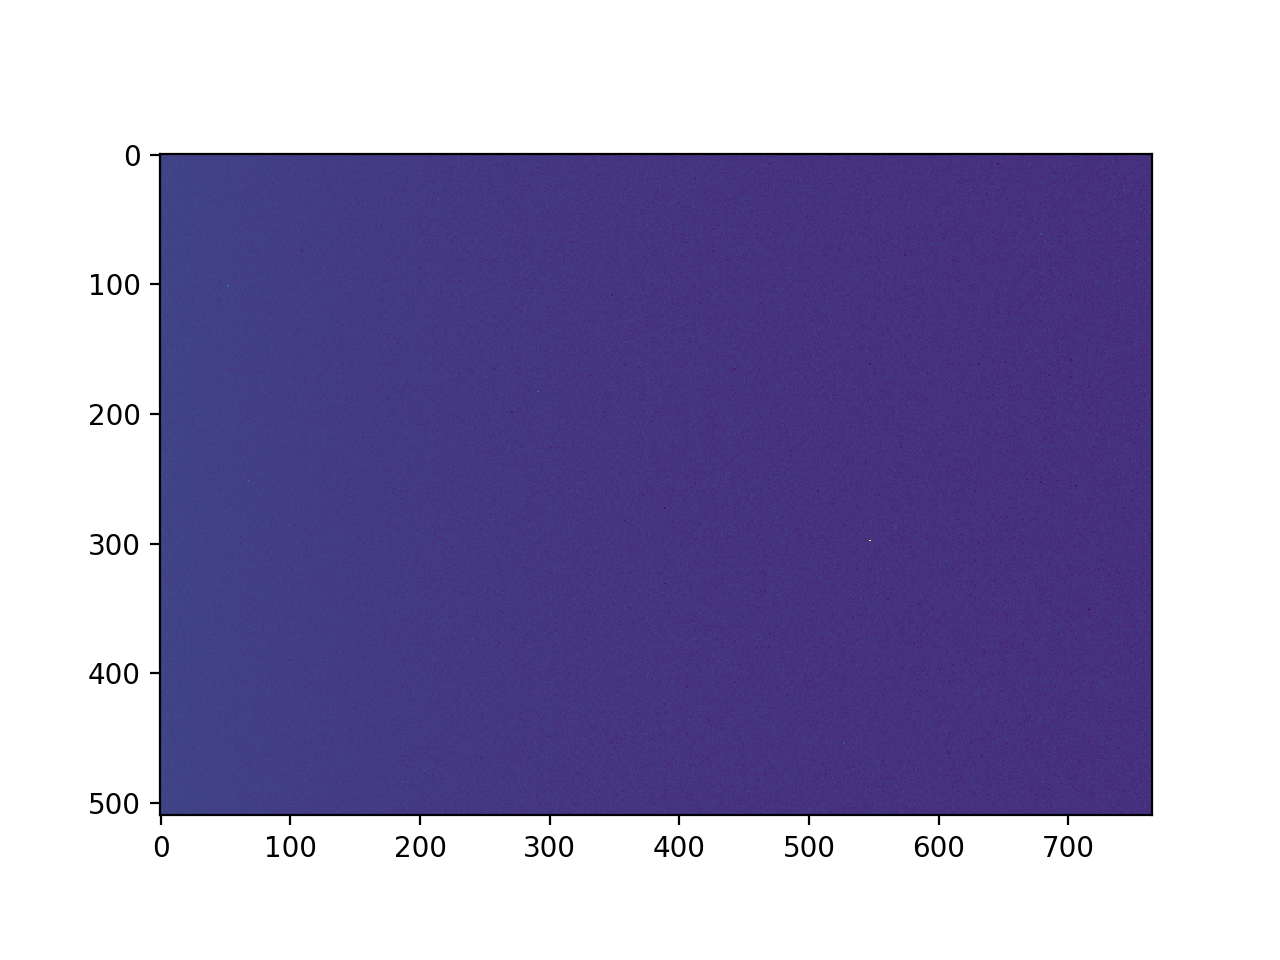

In [13]:
norm = visualization.mpl_normalize.ImageNormalize(stretch=visualization.SqrtStretch())
plt.imshow(f[0].data, norm=norm)
plt.show()

In [ ]:
f.writeto("st402.fits")

In [14]:
f[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  765 / length of data axis 1                          
NAXIS2  =                  510 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
INSTRUME= 'SBIG ST-402 CCD Camera' / CCD Name                                   
TELESCOP= 'Telescope Simulator' / Telescope name                                
OBSERVER= 'Mount Alignment T

In [15]:
int(c.get_float("SBIG CCD", "FILTER_SLOT", "FILTER_SLOT_VALUE"))

2

In [ ]:
f9 = F9WFSCam()

In [ ]:
f9.process_events()

In [ ]:
v = f9.get_vector("SBIG CCD", "CCD_BINNING")
e = v.elements[0]

In [ ]:
for e in v.elements:
    print("%s %s" % (e.getName(), e.get_int()))

In [ ]:
f9.connect()
time.sleep(1)
f9.process_events()

In [ ]:
f9.connected

In [ ]:
f9.process_events()

In [ ]:
f9.wfs_config()

In [ ]:
f9.binning

In [ ]:
f9.get_float("SBIG CCD", "CCD_FRAME", "Y")

In [ ]:
f = f9.expose(exptime=1.0, exptype="Dark")

In [ ]:
norm = visualization.mpl_normalize.ImageNormalize(stretch=visualization.SqrtStretch())
plt.imshow(f[0].data, norm=norm)
plt.show()

In [ ]:
f.writeto("blah_default.fits", clobber=True)

In [ ]:
f[0].data.mean()

In [ ]:
f9.get_float("SBIG CCD", "CCD_TEMPERATURE", "CCD_TEMPERATURE_VALUE")

In [ ]:
f9.get_float("SBIG CCD", "CCD_COOLER_POWER", "CCD_COOLER_VALUE")

In [ ]:
f9.temperature = 5.0

In [ ]:
f9.temperature

In [ ]:
f9.cooling_power

In [ ]:
f9.get_float("SBIG CCD", "CCD_TEMPERATURE", "CCD_TEMPERATURE_VALUE")

In [ ]:
f9.cooler

In [ ]:
f9.process_receive_vector_queue()

In [ ]:
f9.connect()

In [ ]:
f9.process_events()

In [ ]:
f9.temperature

In [ ]:
f9.cooling_on()

In [ ]:
f.writeto("blah.fits", clobber=True)

In [ ]:
f9.ccd_info